<img align=left src="Data/NUSlogo.png" width=125>
<br><br>

# RE2708 Lecture 4

## Hedonic Regression in Python

Dr. Cristian Badarinza

## What is a regression?

* Lecture 4 covers the implementation of a fundamental valuation technique in the field of real estate: the `hedonic regression`.
* Formally, the problem that we need to solve is to estimate coefficients $\alpha$ and $\beta_1,\beta_2$ for the following data model:
$$Y = \alpha+\beta_1X_1+\beta_2X_2 +\cdots + e$$

## Table of Contents

### Hedonic Regression

1. Loading the libraries and the data
1. Scatter plot with trendline
1. Finding the right parameters automatically
1. Logarithms

## 1. Loading the libraries and the data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Data/hdb-transactions-2022.csv')
df = df.dropna()
df = df.loc[df['resale_price'] > 0]

Let's see how our data looks like:

In [3]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,resale_price
0,2022-01,ANG MO KIO,2 ROOM,44,Improved,250000.0
1,2022-01,ANG MO KIO,3 ROOM,73,New Generation,300000.0
2,2022-01,ANG MO KIO,3 ROOM,73,New Generation,328000.0
3,2022-01,ANG MO KIO,3 ROOM,68,New Generation,300000.0
4,2022-01,ANG MO KIO,3 ROOM,68,New Generation,273000.0


## 2. Scatter plot with trendline

(Remember from last week)

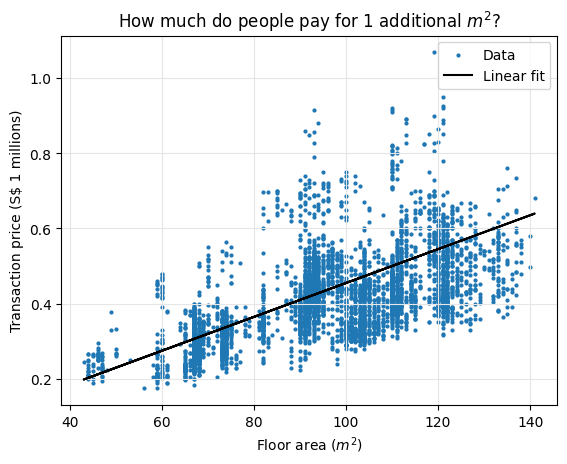

In [4]:
# Linear relationship (Linear trendline)
df['fit_price'] = 5000 + 4500*df['floor_area_sqm']

fig, ax = plt.subplots(1,1)
plt.scatter(df['floor_area_sqm'], df['resale_price']/1000000,s=4, label = 'Data')
plt.plot(df['floor_area_sqm'],df['fit_price']/1000000,color=(0,0,0), label = 'Linear fit')
plt.title('How much do people pay for 1 additional $m^2$?')
plt.xlabel('Floor area ($m^2$)')
plt.ylabel('Transaction price (S$ 1 millions)')
plt.legend()
plt.grid(color=(.9,.9,.9))
plt.show()

## 3. Finding the right parameters automatically


The library `statsmodels` offers us the the function `ols` (Ordinary Least Squares) to find the best linear fit automatically:

In [5]:
reg1 = smf.ols("resale_price ~ floor_area_sqm", data = df).fit()

reg1.params

Intercept         83160.800879
floor_area_sqm     3424.687921
dtype: float64

How do we interpret this result?

_**For any additional square meter, the price of the property is increasing by $3,425**_.

Let's now plot the trendline:


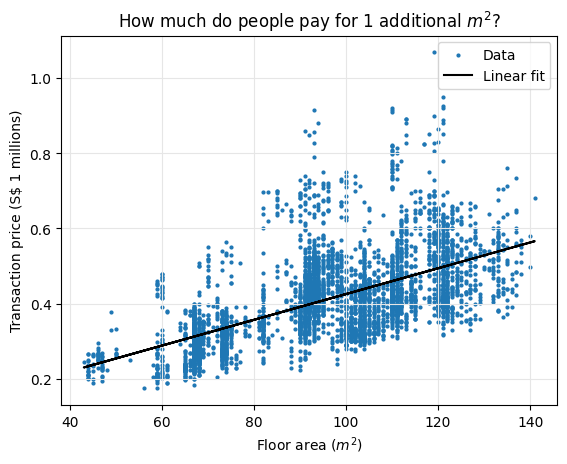

In [6]:
# Linear relationship (Linear trendline)
df['fit_price'] = reg1.params[0] + reg1.params[1]*df['floor_area_sqm']

fig, ax = plt.subplots(1,1)
plt.scatter(df['floor_area_sqm'], df['resale_price']/1000000,s=4, label = 'Data')
plt.plot(df['floor_area_sqm'],df['fit_price']/1000000,color=(0,0,0), label = 'Linear fit')
plt.title('How much do people pay for 1 additional $m^2$?')
plt.xlabel('Floor area ($m^2$)')
plt.ylabel('Transaction price (S$ 1 millions)')
plt.legend()
plt.grid(color=(.9,.9,.9))
plt.show()

## 4. Logarithms

In [7]:
reg3 = smf.ols("np.log(resale_price) ~ np.log(floor_area_sqm)", data = df).fit()

reg3.params

Intercept                 9.229769
np.log(floor_area_sqm)    0.806529
dtype: float64

How do we interpret this result?

_**For any additional 100% larger floor area, the price of the property is increasing by 80.7%**_